In [1]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#FT-Distilled BERT
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from numpy import argmax

### 1) Import dataset

In [2]:
review_df = pd.read_csv('file_path')

In [3]:
review_df

,Unnamed: 0,Product,Customer Name,Date of Review,Country,Review,Product URL,Rating
0,0,Original Cleansing Face Wipes • 20 wipes,Kerish Albano,13 Jun 2023,Australia,coconut wipe It does remove my makeup but had ...,https://www.sephora.sg/products/sephora-collec...,3.5
1,1,Original Cleansing Face Wipes • 20 wipes,Seeya Nair,13 Jun 2023,Malaysia,works so well 1 tissues cleanse all my makeup,https://www.sephora.sg/products/sephora-collec...,5.0
2,2,Original Cleansing Face Wipes • 20 wipes,Mable lee,12 Jun 2023,Malaysia,face wipes Makeup remover is very clean and mo...,https://www.sephora.sg/products/sephora-collec...,4.0
3,3,Original Cleansing Face Wipes • 20 wipes,Gugu Mutema,08 Jun 2023,Australia,Mrs Love these. They took my makeup off nicely,https://www.sephora.sg/products/sephora-collec...,5.0
4,4,Original Cleansing Face Wipes • 20 wipes,Naima Ali,06 Jun 2023,Australia,"Cleans well :) It's gentle on the skin, does t...",https://www.sephora.sg/products/sephora-collec...,5.0
...,...,...,...,...,...,...,...,...
530557,187322,Pout Preserve Peptide Lip Treatment,International Reviewer,18 Jan 2023,Canada,"My new favourite lip balm So moisturizing, som...",https://www.sephora.sg/products/ole-henriksen-...,4.0
530558,187323,Pout Preserve Peptide Lip Treatment,International Reviewer,17 Jan 2023,USA,Must have for everyone I think I basically own...,https://www.sephora.sg/products/ole-henriksen-...,5.0
530559,187324,Pout Preserve Peptide Lip Treatment,International Reviewer,16 Jan 2023,Canada,GOAT This is the ONE - Pls never stop making t...,https://www.sephora.sg/products/ole-henriksen-...,5.0
530560,187325,Pout Preserve Peptide Lip Treatment,International Reviewer,14 Jan 2023,USA,Nice lip balm Very nice and smooth on the lips...,https://www.sephora.sg/products/ole-henriksen-...,4.0


In [4]:
review_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

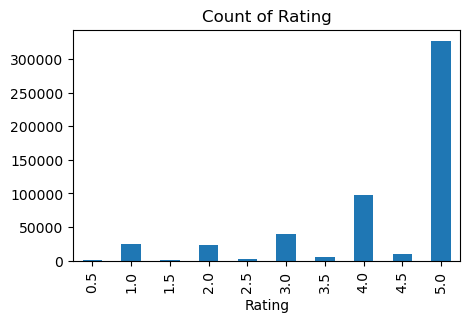

In [5]:
review_df['Rating'].value_counts().sort_index().plot(kind='bar', title= 'Count of Rating', figsize=(5,3))
plt.show()

### 2) Fine-tuned distilled BERT

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from numpy import argmax

In [5]:
# Load the fine-tuned model from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("LiYuan/amazon-review-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("LiYuan/amazon-review-sentiment-analysis")

In [23]:
# Tokenize input text
text = "Sticky Leaves my face feeling sticky, and the cloth is fairly dry. Doesn’t leave your face feeling super clean. I like the smell but it is pretty strong for something going on your face."
inputs = tokenizer(text, return_tensors="pt")

# Make prediction
outputs = model(**inputs)
scores = outputs[0][0].detach().numpy()
scores = softmax(scores)
predicted_label = argmax(scores) + 1

print(predicted_label)

3


In [6]:
def fine_tuned_distilled_BERT(example, outputs):
    scores = outputs[0][0].detach().numpy()
    scores = softmax(scores)
    predicted_label = argmax(scores) + 1

    scores_dict = {
        'predicted score': predicted_label,
    }

    return scores_dict

In [7]:
review_df2 = review_df.iloc[:100000]
review_df3 = review_df.iloc[100000:200000]
review_df4 = review_df.iloc[200000:300000]
review_df5 = review_df.iloc[300000:400000]
review_df6 = review_df.iloc[400000:]

In [9]:
# result1 = {}
# result2 = {}
# result3 = {}
# result4 = {}
result5 = {}

In [12]:
for i, row in tqdm(review_df6.iterrows(), total=len(review_df6)):
    try:
        text = row['Review']
        myid = row['id']
        inputs = tokenizer(text, return_tensors='pt')
        outputs = model(**inputs)
        fine_tuned_distilled_bert_result = fine_tuned_distilled_BERT(text, outputs)
        result5[myid] = fine_tuned_distilled_bert_result

    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/130562 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (805 > 512). Running this sequence through the model will result in indexing errors


Broke for id 410001
Broke for id 414587
Broke for id 414661
Broke for id 420384
Broke for id 423158
Broke for id 424516
Broke for id 426825
Broke for id 427174
Broke for id 436391
Broke for id 450681
Broke for id 451686
Broke for id 456192
Broke for id 457002
Broke for id 457640
Broke for id 459633
Broke for id 459983
Broke for id 459985
Broke for id 462997
Broke for id 465061
Broke for id 468507
Broke for id 470899
Broke for id 473770
Broke for id 475148
Broke for id 477225
Broke for id 477376
Broke for id 478880
Broke for id 479062
Broke for id 482690
Broke for id 482706
Broke for id 491292
Broke for id 491320
Broke for id 492921
Broke for id 493152
Broke for id 494487
Broke for id 495919
Broke for id 496225
Broke for id 496863
Broke for id 497094
Broke for id 502112
Broke for id 503825
Broke for id 514399
Broke for id 514418
Broke for id 519909
Broke for id 520758
Broke for id 525985
Broke for id 526153
Broke for id 526301
Broke for id 527057
Broke for id 530019


In [13]:
result5

{400000: {'predicted score': 5},
 400001: {'predicted score': 5},
 400002: {'predicted score': 5},
 400003: {'predicted score': 5},
 400004: {'predicted score': 5},
 400005: {'predicted score': 5},
 400006: {'predicted score': 5},
 400007: {'predicted score': 5},
 400008: {'predicted score': 5},
 400009: {'predicted score': 5},
 400010: {'predicted score': 5},
 400011: {'predicted score': 5},
 400012: {'predicted score': 5},
 400013: {'predicted score': 5},
 400014: {'predicted score': 5},
 400015: {'predicted score': 5},
 400016: {'predicted score': 5},
 400017: {'predicted score': 5},
 400018: {'predicted score': 5},
 400019: {'predicted score': 5},
 400020: {'predicted score': 5},
 400021: {'predicted score': 5},
 400022: {'predicted score': 5},
 400023: {'predicted score': 5},
 400024: {'predicted score': 5},
 400025: {'predicted score': 5},
 400026: {'predicted score': 5},
 400027: {'predicted score': 5},
 400028: {'predicted score': 5},
 400029: {'predicted score': 5},
 400030: {

In [14]:
ft_bert_results_df5 = pd.DataFrame(result5).T

In [15]:
ft_bert_results_df5 = ft_bert_results_df5.reset_index().rename(columns={'index': 'id'})

In [16]:
ft_bert_results_df5

,id,predicted score
0,400000,5
1,400001,5
2,400002,5
3,400003,5
4,400004,5
...,...,...
130508,530557,5
130509,530558,5
130510,530559,5
130511,530560,5


In [17]:
# ft_bert_results_df5.to_csv('file_path')

In [18]:
ft_bert_results_df5 = ft_bert_results_df5.merge(file_path, how='left')
ft_bert_results_df5

,id,predicted score,Product,Customer Name,Date of Review,Country,Review,Product URL,Rating,Remove Special Character,Stopwords Removal,Lemmatized,Removed Excluded,POS Tagged,Filtered Tokens,Concepts,Types
0,400000,5,Barrier Booster Orange Ferment Essence,International Reviewer,23 Feb 2023,USA,Barrier Life! I received this product complime...,https://www.sephora.sg/products/ole-henriksen-...,5.0,Barrier Life I received this product complimen...,"['barrier', 'life', 'received', 'product', 'co...","['barrier', 'life', 'received', 'product', 'co...","['barrier', 'life', 'received', 'product', 'co...","[('barrier', 'NN'), ('life', 'NN'), ('received...","[('barrier', 'NN'), ('life', 'NN'), ('received...","['barrier', 'life', 'merchandise', 'merchandis...","['barrier', 'life', 'product', 'product', 'day..."
1,400001,5,Barrier Booster Orange Ferment Essence,International Reviewer,23 Feb 2023,USA,Ole Henriksen Barrier Booster Orange Ferment E...,https://www.sephora.sg/products/ole-henriksen-...,5.0,Ole Henriksen Barrier Booster Orange Ferment E...,"['ole', 'henriksen', 'barrier', 'booster', 'or...","['ole', 'henriksen', 'barrier', 'booster', 'or...","['ole', 'henriksen', 'barrier', 'booster', 'or...","[('ole', 'JJ'), ('henriksen', 'NN'), ('barrier...","[('ole', 'JJ'), ('henriksen', 'NN'), ('barrier...","['barrier', 'supporter', 'orange', 'kernel', '...","['henriksen', 'barrier', 'booster', 'orange', ..."
2,400002,5,Barrier Booster Orange Ferment Essence,International Reviewer,23 Feb 2023,USA,Ole Henriksen Barrier Booster Orange Ferment E...,https://www.sephora.sg/products/ole-henriksen-...,5.0,Ole Henriksen Barrier Booster Orange Ferment E...,"['ole', 'henriksen', 'barrier', 'booster', 'or...","['ole', 'henriksen', 'barrier', 'booster', 'or...","['ole', 'henriksen', 'barrier', 'booster', 'or...","[('ole', 'JJ'), ('henriksen', 'NN'), ('barrier...","[('ole', 'JJ'), ('henriksen', 'NN'), ('barrier...","['barrier', 'supporter', 'orange', 'kernel', '...","['henriksen', 'barrier', 'booster', 'orange', ..."
3,400003,5,Barrier Booster Orange Ferment Essence,International Reviewer,23 Feb 2023,USA,Ole Henriksen Barrier Booster Orange Ferment E...,https://www.sephora.sg/products/ole-henriksen-...,4.0,Ole Henriksen Barrier Booster Orange Ferment E...,"['ole', 'henriksen', 'barrier', 'booster', 'or...","['ole', 'henriksen', 'barrier', 'booster', 'or...","['ole', 'henriksen', 'barrier', 'booster', 'or...","[('ole', 'JJ'), ('henriksen', 'NN'), ('barrier...","[('ole', 'JJ'), ('henriksen', 'NN'), ('barrier...","['barrier', 'supporter', 'orange', 'kernel', '...","['henriksen', 'barrier', 'booster', 'orange', ..."
4,400004,5,Barrier Booster Orange Ferment Essence,International Reviewer,23 Feb 2023,USA,Feels and smells great! I received this produc...,https://www.sephora.sg/products/ole-henriksen-...,5.0,Feels and smells great I received this product...,"['feels', 'smells', 'great', 'received', 'prod...","['feel', 'smell', 'great', 'received', 'produc...","['feel', 'smell', 'great', 'received', 'produc...","[('feel', 'NN'), ('smell', 'RB'), ('great', 'J...","[('feel', 'NN'), ('smell', 'RB'), ('great', 'J...","['feel', 'merchandise', 'merchandise', 'fuss',...","['feel', 'product', 'product', 'didnt', 'bothe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130508,530557,5,Pout Preserve Peptide Lip Treatment,International Reviewer,18 Jan 2023,Canada,"My new favourite lip balm So moisturizing, som...",https://www.sephora.sg/products/ole-henriksen-...,4.0,My new favourite lip balm So moisturizing some...,"['new', 'favourite', 'lip', 'balm', 'moisturiz...","['new', 'favourite', 'lip', 'balm', 'moisturiz...","['new', 'favourite', 'lip', 'balm', 'moisturiz...","[('new', 'JJ'), ('favourite', 'JJ'), ('lip', '...","[('new', 'JJ'), ('favourite', 'JJ'), ('lip', '...","['lip', 'balm', 'lip', 'redemption', 'purchase']","['lip', 'balm', 'something', 'lip', 'repurchas..."
130509,530558,5,Pout Preserve Peptide Lip Treatment,International Reviewer,1

In [19]:
# ft_bert_results_df5.to_csv('file_path')

In [28]:
ft_bert_results_df = pd.DataFrame(result).T
ft_bert_results_df = ft_bert_results_df.reset_index().rename(columns={'index': 'id'})
ft_bert_results_df = ft_bert_results_df.merge(review_df2, how='left')
#Sentiment score and meta data
ft_bert_results_df.head()

,id,predicted score,Product,Customer Name,Date of Review,Country,Review,Product URL,Rating,Remove Special Character,Stopwords Removal,Lemmatized,Removed Excluded,POS Tagged,Filtered Tokens,Concepts,Types
0,0,4,Original Cleansing Face Wipes • 20 wipes,Kerish Albano,13 Jun 2023,Australia,coconut wipe It does remove my makeup but had ...,https://www.sephora.sg/products/sephora-collec...,3.5,coconut wipe It does remove my makeup but had ...,"['coconut', 'wipe', 'remove', 'makeup', 'use',...","['coconut', 'wipe', 'remove', 'makeup', 'use',...","['coconut', 'wipe', 'remove', 'makeup', 'use',...","[('coconut', 'NN'), ('wipe', 'WRB'), ('remove'...","[('coconut', 'NN'), ('wipe', 'WRB'), ('remove'...","['coconut', 'makeup', 'use', 'rub']","['coconut', 'makeup', 'use', 'wipe']"
1,1,5,Original Cleansing Face Wipes • 20 wipes,Seeya Nair,13 Jun 2023,Malaysia,works so well 1 tissues cleanse all my makeup,https://www.sephora.sg/products/sephora-collec...,5.0,works so well 1 tissues cleanse all my makeup,"['works', 'well', '1', 'tissues', 'cleanse', '...","['work', 'well', '1', 'tissue', 'cleanse', 'ma...","['work', 'well', '1', 'tissue', 'cleanse', 'ma...","[('work', 'NN'), ('well', 'RB'), ('1', 'CD'), ...","[('work', 'NN'), ('well', 'RB'), ('1', 'CD'), ...","['work', 'tissue', 'cleanse', 'makeup']","['work', 'tissue', 'cleanse', 'makeup']"
2,2,5,Original Cleansing Face Wipes • 20 wipes,Mable lee,12 Jun 2023,Malaysia,face wipes Makeup remover is very clean and mo...,https://www.sephora.sg/products/sephora-collec...,4.0,face wipes Makeup remover is very clean and mo...,"['face', 'wipes', 'makeup', 'remover', 'clean'...","['face', 'wipe', 'makeup', 'remover', 'clean',...","['face', 'wipe', 'makeup', 'remover', 'clean',...","[('face', 'NN'), ('wipe', 'WRB'), ('makeup', '...","[('face', 'NN'), ('wipe', 'WRB'), ('makeup', '...","['face', 'makeup', 'remover']","['face', 'makeup', 'remover']"
3,3,5,Original Cleansing Face Wipes • 20 wipes,Gugu Mutema,08 Jun 2023,Australia,Mrs Love these. They took my makeup off nicely,https://www.sephora.sg/products/sephora-collec...,5.0,Mrs Love these They took my makeup off nicely,"['mrs', 'love', 'took', 'makeup', 'nicely']","['mr', 'love', 'took', 'makeup', 'nicely']","['love', 'took', 'makeup', 'nicely']","[('love', 'NN'), ('took', 'VBD'), ('makeup', '...","[('love', 'NN'), ('took', 'VBD'), ('makeup', '...","['love', 'makeup']","['love', 'makeup']"
4,4,5,Original Cleansing Face Wipes • 20 wipes,Naima Ali,06 Jun 2023,Australia,"Cleans well :) It's gentle on the skin, does t...",https://www.sephora.sg/products/sephora-collec...,5.0,Cleans well Its gentle on the skin does the job,"['cleans', 'well', 'gentle', 'skin', 'job']","['clean', 'well', 'gentle', 'skin', 'job']","['clean', 'well', 'gentle', 'skin', 'job']","[('clean', 'JJ'), ('well', 'RB'), ('gentle', '...","[('clean', 'JJ'), ('well', 'RB'), ('gentle', '...","['skin', 'occupation']","['skin', 'job']"


In [21]:
mse = mean_squared_error(ft_bert_results_df5['Rating'], ft_bert_results_df5['predicted score'])

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.47231310290928874


In [22]:
mae = mean_absolute_error(ft_bert_results_df5['Rating'], ft_bert_results_df5['predicted score'])
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.323485016818248


### 3) FT Bert evaluation

In [ ]:
# df1 = pd.read_csv('Sentiment Analysis df 1 to 100000 07_07_23.csv')
# df2 = pd.read_csv('Sentiment Analysis df 100000 to 200000 08_07_23.csv')
# df3 = pd.read_csv('Sentiment Analysis df 200000 to 300000 09_07_23.csv')
# df4 = pd.read_csv('Sentiment Analysis df 300000 to 400000 09_07_23.csv')
# df5 = pd.read_csv('Sentiment Analysis df 400000 to 500000 10_07_23.csv')

In [ ]:
ft_bert_df = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [ ]:
ft_bert_df.head(1)

In [ ]:
mse = mean_squared_error(ft_bert_df['Rating'], ft_bert_df['predicted score'])

print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(ft_bert_df['Rating'], ft_bert_df['predicted score'])
print(f'Mean Absolute Error: {mae}')

In [29]:
def sentiment_classified(score):
    if score >= 4:
        return 'positive'
    elif score <=2:
        return 'negative'
    else:
        return 'neutral'

In [30]:
ft_bert_df['predicted sentiment'] = ft_bert_df['predicted score'].apply(sentiment_classified)
ft_bert_df['actual sentiment'] = ft_bert_df['Rating'].apply(sentiment_classified)

In [31]:
ft_bert_df.head(1)

,Unnamed: 0,id,predicted score,Product,Customer Name,Date of Review,Country,Review,Product URL,Rating,Remove Special Character,Stopwords Removal,Lemmatized,Removed Excluded,POS Tagged,Filtered Tokens,Concepts,Types,predicted sentiment,actual sentiment
0,0,0,4,Original Cleansing Face Wipes • 20 wipes,Kerish Albano,13 Jun 2023,Australia,coconut wipe It does remove my makeup but had ...,https://www.sephora.sg/products/sephora-collec...,3.5,coconut wipe It does remove my makeup but had ...,"['coconut', 'wipe', 'remove', 'makeup', 'use',...","['coconut', 'wipe', 'remove', 'makeup', 'use',...","['coconut', 'wipe', 'remove', 'makeup', 'use',...","[('coconut', 'NN'), ('wipe', 'WRB'), ('remove'...","[('coconut', 'NN'), ('wipe', 'WRB'), ('remove'...","['coconut', 'makeup', 'use', 'rub']","['coconut', 'makeup', 'use', 'wipe']",positive,neutral


In [11]:
# ft_bert_df.to_csv('file_path')

### Confusion metrics

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
y_true = ft_bert_df['actual sentiment']
y_pred = ft_bert_df['predicted sentiment']

#Encode labels to numbers
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_encoded, y_pred_encoded)
cm2 = confusion_matrix(y_true_encoded, y_pred_encoded, normalize='true')
# Get the class labels
class_labels = label_encoder.classes_

In [34]:
y_true_encoded

array([1, 2, 2, ..., 2, 2, 2])

In [35]:
y_pred_encoded

array([2, 2, 2, ..., 2, 2, 2])

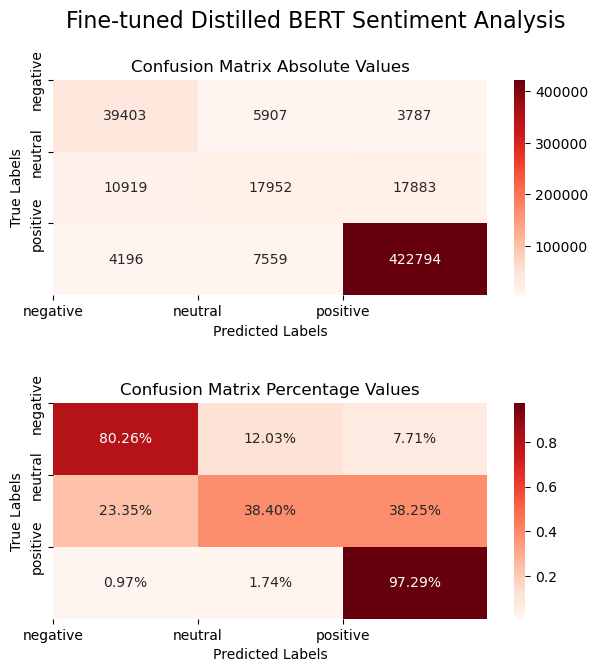

In [45]:
# Plot the confusion matrix using heatmap
fig = plt.figure(figsize = (7,7))
axes1 = fig.add_subplot(2,1,1)


sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axes1)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels)
plt.title('Confusion Matrix Absolute Values')

plt.subplots_adjust(hspace=0.5)

axes2 = fig.add_subplot(2,1,2)
sns.heatmap(cm2, annot=True, fmt='.2%', cmap='Reds', ax=axes2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels)
plt.title('Confusion Matrix Percentage Values')

plt.suptitle('Fine-tuned Distilled BERT Sentiment Analysis', fontsize=16)

plt.show()

In [117]:
ft_bert_df = ft_bert_df.drop(columns = ['Unnamed: 0', 'Remove Special Character', 'Stopwords Removal', 'Lemmatized', 'Removed Excluded', 'POS Tagged', 'Filtered Tokens', 'Concepts', 'Types', 'Customer Name', 'Product URL'])